# EN3160 - Internsity Transformations and Neighborhood Filtering

## Question 01

In [148]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

In [149]:
c = np.array([(50,50), (50,100), (150,255), (150,150), (255,255)])

t1 = np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')
print(len(transform))


256


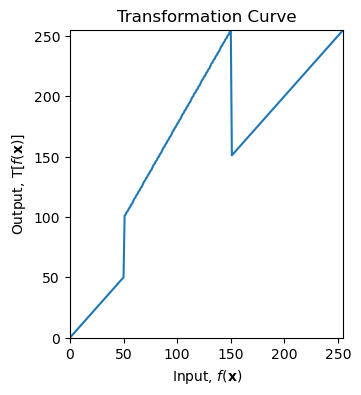

In [150]:
fig = plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(transform)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

plt.show()

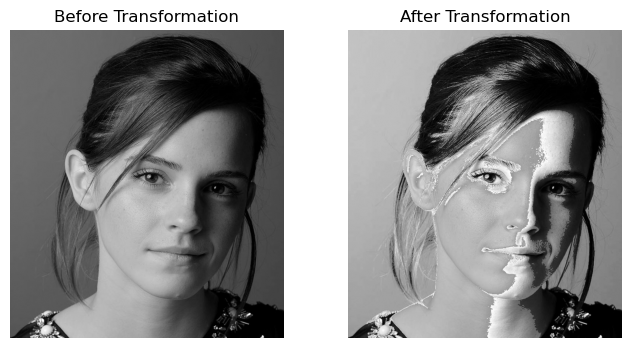

In [151]:
img_orig = cv.imread(IMG_PATH+"emma.jpg",cv.IMREAD_GRAYSCALE)
img_transformed = cv.LUT(img_orig,transform)

fig = plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(img_orig,cmap="gray")
plt.title("Before Transformation")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_transformed,cmap="gray")
plt.title("After Transformation")
plt.axis('off')

plt.show()

## Question 2

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

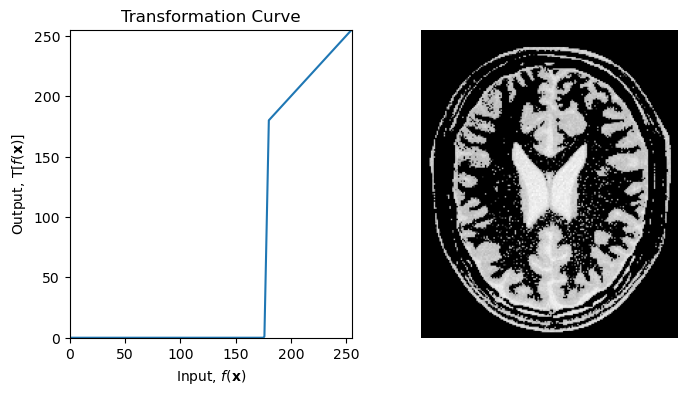

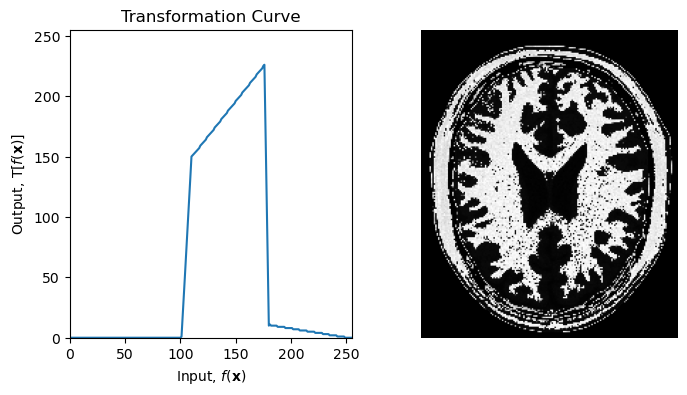

In [153]:
img_brain = cv.imread(IMG_PATH+"brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)

#####################  Tranformation for White matter  ##########################

c= np.array([(0,0), (175,0), (180,180), (255,255)]) #white matter range : 175-255

t1=np.linspace(c[0,1],c[1,1],c[1,0]+1-c[0,0]).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')

transform_white = np.concatenate((t1,t2,t3),axis=0).astype('uint8')

img_whitematter = cv.LUT(img_brain,transform_white)

#####################  Tranformation for Gray matter  ##########################

c= np.array([(0,0), (100,0), (110,150), (175,225), (180,10), (255,0)]) #gray matter range : 100-175

t1=np.linspace(c[0,1],c[1,1],c[1,0]+1-c[0,0]).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
t4=np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')
t5=np.linspace(c[4,1]+1,c[5,1],c[5,0]-c[4,0]).astype('uint8')

transform_gray = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')

img_graymatter = cv.LUT(img_brain,transform_gray)


fig = plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(transform_white)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

plt.subplot(122)
plt.imshow(img_whitematter,cmap='gray')
plt.axis('off')

fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(transform_gray)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

plt.subplot(122)
plt.imshow(img_graymatter,cmap='gray')
plt.axis('off')

plt.show()


## Question 3

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

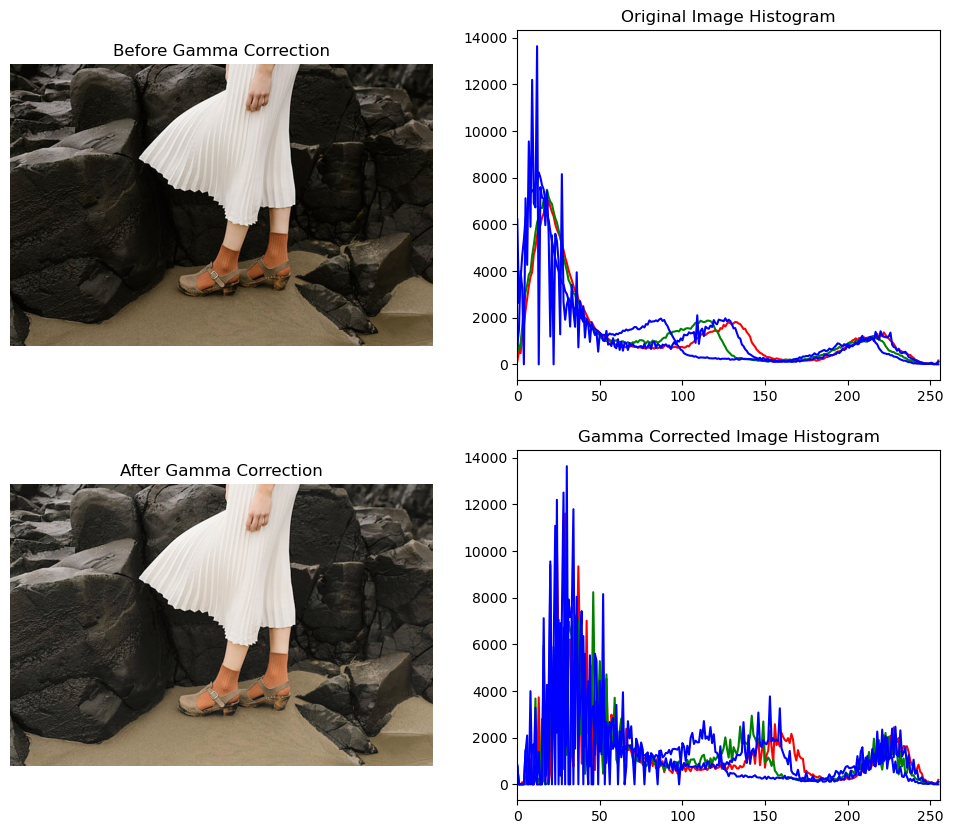

In [155]:
# For the gamma correction we need to work on the luminance channel. 
# We need to read the image on LAB color space

img = cv.imread(IMG_PATH+"highlights_and_shadows.jpg")
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
gamma = 0.7

t=np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')

L_channel,*_ = cv.split(img_lab)

L_gamma= cv.LUT(L_channel,t)

img_gamma = cv.merge((L_gamma,*_))

img_corrected = cv.cvtColor(img_gamma,cv.COLOR_Lab2RGB)

fig=plt.figure(figsize=(12,10))

plt.subplot(221)
plt.imshow(img_rgb)
plt.title("Before Gamma Correction")
plt.axis('off')


plt.subplot(223)
plt.imshow(img_corrected)
plt.title("After Gamma Correction")
plt.axis('off')


plt.subplot(222)
plt.title("Original Image Histogram")
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    # Calculate histogram for each channel (R, G, B)
    hist = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

hist_l = cv.calcHist([L_channel], [0], None, [256], [0, 256])
plt.plot(hist_l, color=color)


plt.subplot(224)
plt.title("Gamma Corrected Image Histogram")
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    # Calculate histogram for each channel (R, G, B)
    hist = cv.calcHist([img_corrected], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

hist_l = cv.calcHist([L_gamma], [0], None, [256], [0, 256])
plt.plot(hist_l, color=color)

plt.show()


## Question 04

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

In [157]:
from ipywidgets import interact, FloatSlider

img = cv.imread(IMG_PATH+"spider.png")

a = 0.5
sigma = 70



def update_saturation(a):
    
    img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    h,s,v = cv.split(img_hsv)

    x = np.arange(0, 256, dtype=np.float64)

    # Calculate the transformation based on the current 'a' from the slider
    transformation = x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2))
    
    # Create the Look-Up Table (LUT)
    lut = np.clip(transformation, 0, 255).astype('uint8')
    
    # Apply the LUT to the saturation channel
    s_transformed = cv.LUT(s, lut) 
    
    # Merge the channels back and convert to RGB
    img_transformed_hsv = cv.merge([h, s_transformed, v])
    img_transformed_rgb = cv.cvtColor(img_transformed_hsv, cv.COLOR_HSV2RGB)
    
    # --- Display the images ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(img_transformed_rgb)
    axes[1].set_title(f'Transformed Image (a = {a:.2f})')
    axes[1].axis('off')

    # Intensity Transformation Plot

    fig = plt.figure(figsize=(4,4))
    plt.plot(x, lut, color='crimson', linewidth=2, label='Transformation Curve')
    plt.plot(x, x, linestyle='--', color='gray', label='Original (y=x)') # Reference line
    plt.title('Intensity Transformation (LUT)')
    plt.xlabel('Input Saturation')
    plt.ylabel('Output Saturation')
    plt.xlim([0, 255])
    plt.ylim([0, 260])
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend()


    plt.show()
    

_=interact(
        update_saturation, 
        a=FloatSlider(
            min=0.0, 
            max=1.0, 
            step=0.05, 
            value=0.5, 
            description='Strength (a):',
            style={'description_width': 'initial'} # Ensures the description is not cut off
        )
    )

interactive(children=(FloatSlider(value=0.5, description='Strength (a):', max=1.0, step=0.05, style=SliderStyl…

## Question 05

In [158]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

In [159]:
def equalize_histogram(img):

    hist = cv.calcHist([img], [0], None, [256], [0, 256]).flatten()

    # Creating a LUT to equalize the image. 

    # Calculate the Cumulative Distribution Function (CDF)
    cdf = hist.cumsum()

    # Mask the CDF to ignore zeros when finding the minimum
    cdf_masked = np.ma.masked_equal(cdf, 0)

    # Normalization of the CDF.
    cdf_normalized = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())

    # Fill masked values with 0
    cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')

    # Apply the LUT to the original image
    equalized_img = cv.LUT(img, cdf_final)

    return equalized_img

    

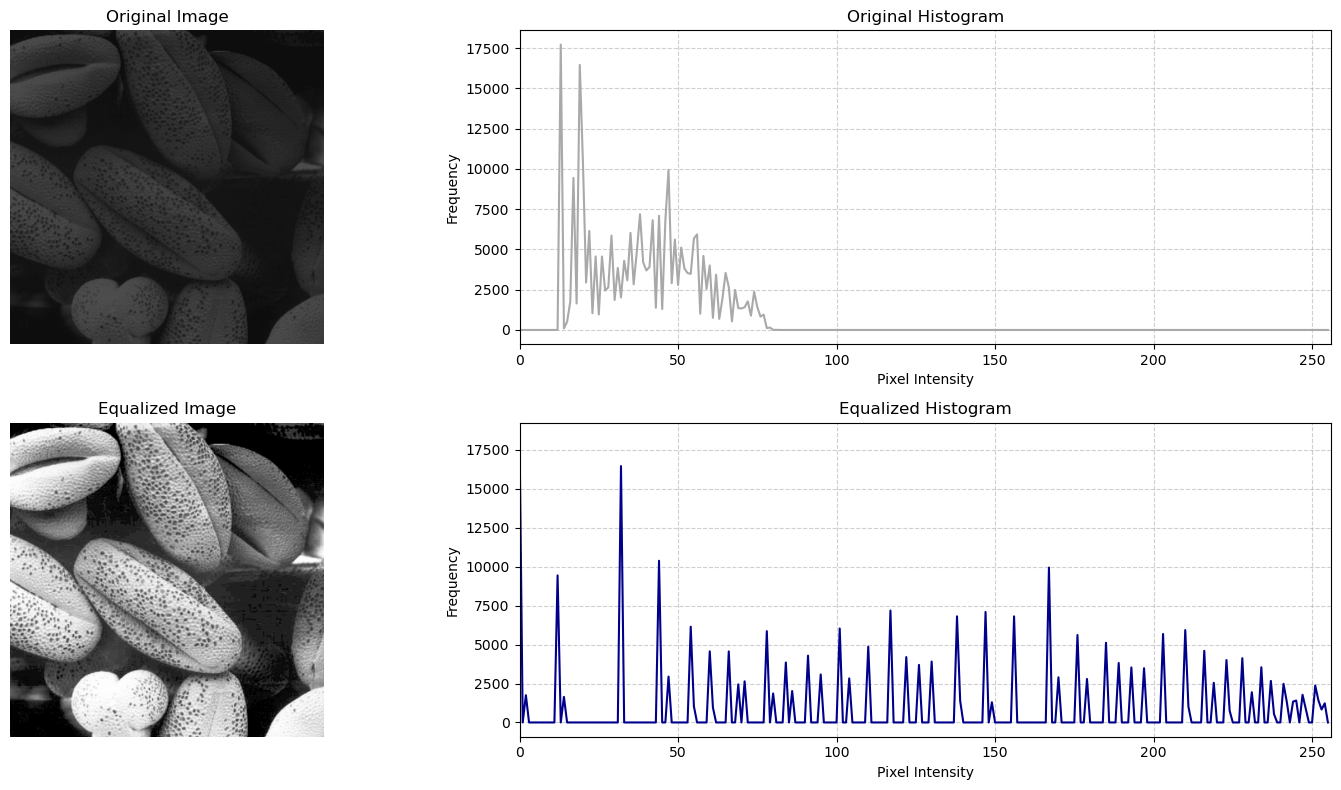

In [161]:
img = cv.imread(IMG_PATH+"shells.tif", cv.IMREAD_GRAYSCALE)

equalized_img = equalize_histogram(img)

# Original histogram
hist_original = cv.calcHist([img], [0], None, [256], [0, 256])
# Equalized histogram
hist_equalized = cv.calcHist([equalized_img], [0], None, [256], [0, 256])

# Display the results.
fig = plt.figure(figsize=(16,8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Original Histogram
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='darkgray')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid(True, linestyle='--', alpha=0.6)


# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Equalized Histogram
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='darkblue')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Question 06

In [135]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

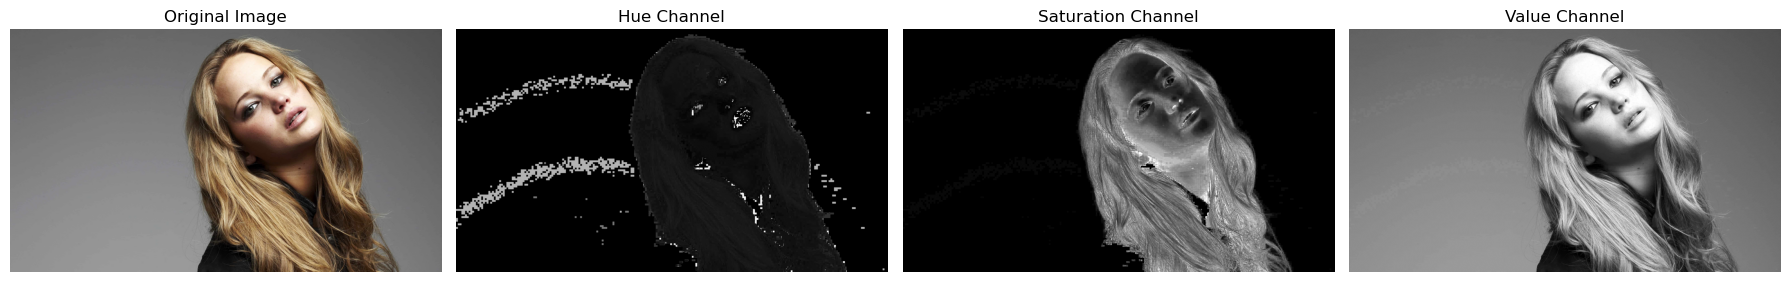

In [162]:
img = cv.imread(IMG_PATH+"jeniffer.jpg",cv.IMREAD_COLOR_RGB)

hsv_img = cv.cvtColor(img,cv.COLOR_RGB2HSV)

h,s,v = cv.split(hsv_img)

fig = plt.figure(figsize=(18,4))

plt.subplot(141)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(h, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


Based on the 3 channels saturation channel is most suitable for masking the foreground. After few trials threshold value for the masking is selected as 15

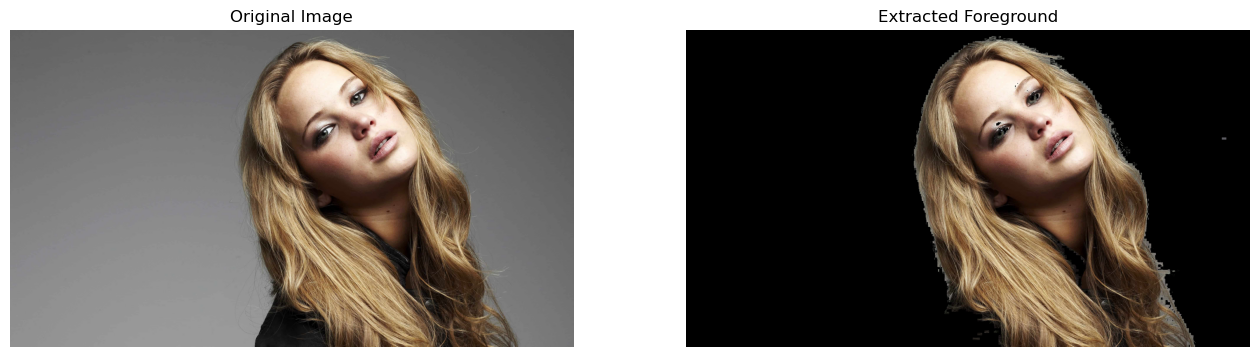

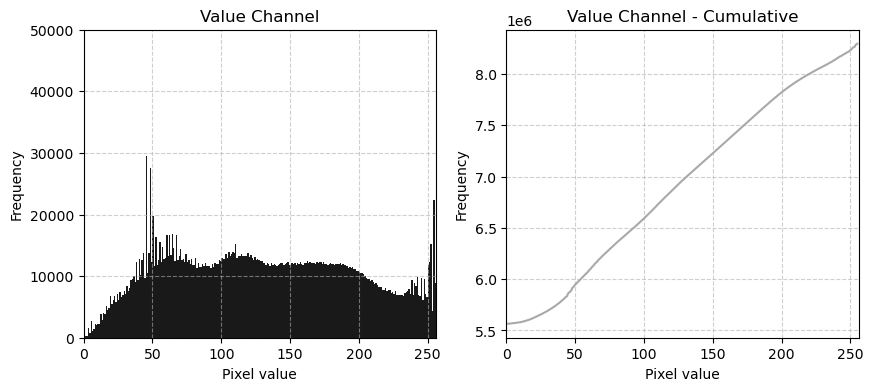

In [163]:
ret,mask = cv.threshold(s,11,255,cv.THRESH_BINARY)

img_foreground_hsv = cv.bitwise_and(hsv_img,hsv_img,mask = mask)

img_foreground_rgb = cv.cvtColor(img_foreground_hsv, cv.COLOR_HSV2RGB)

fig = plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_foreground_rgb)
plt.title('Extracted Foreground')
plt.axis('off')


h_fore,s_fore,v_fore = cv.split(img_foreground_hsv)


# Calculate histogram for foreground of value channel in HSV color space
v_hist = cv.calcHist([img_foreground_hsv], [2], None, [256], [0, 256])

# Obtain the culmulative sum of the histogram
cumulative_hist_v = np.cumsum(v_hist)

fig = plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.hist(v_fore.flatten(), bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Value Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.ylim([0, 50000])
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(122)
plt.plot(cumulative_hist_v, color='darkgray')
plt.title('Value Channel - Cumulative')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid(True, linestyle='--', alpha=0.6)


plt.show()



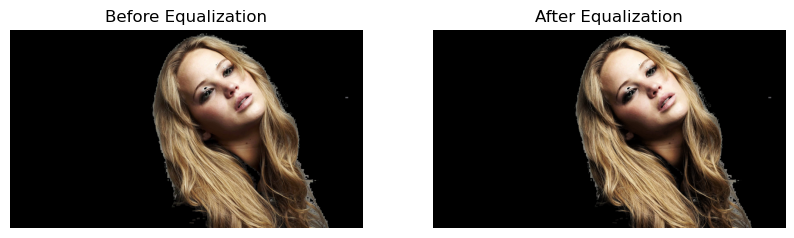

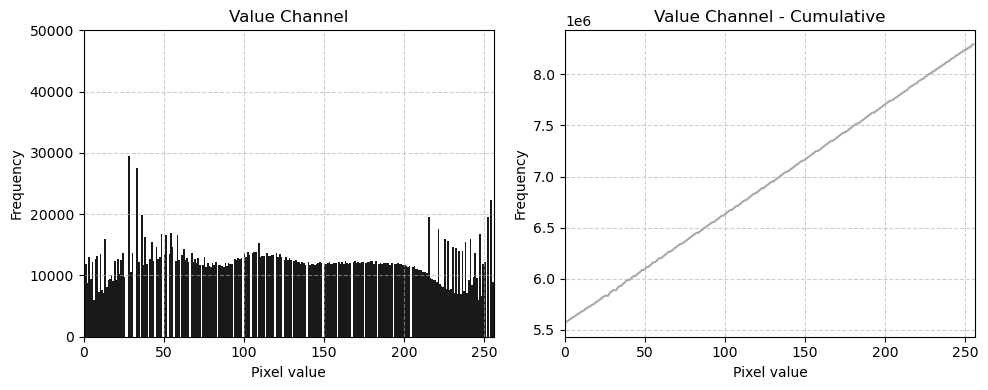

In [ ]:
h_fore,s_fore,v_fore = cv.split(img_foreground_hsv)
v_eq = cv.equalizeHist(v_fore)

equalized_img_hsv = cv.merge([h_fore, s_fore, v_eq])

v_cumulative = np.cumsum(cv.calcHist([equalized_img_hsv],[2],None,[256],[0,256]))


fig = plt.figure(figsize=(10,6))

plt.subplot(121)
plt.imshow(img_foreground_rgb)
plt.title('Before Equalization')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(equalized_img,cv.COLOR_HSV2RGB))
plt.title('After Equalization')
plt.axis('off')



fig = plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.hist(v_eq.flatten(), bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Value Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.ylim([0,50000])
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(122)
plt.plot(v_cumulative, color='darkgray')
plt.title('Value Channel - Cumulative')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()




(np.float64(-0.5), np.float64(3839.5), np.float64(2159.5), np.float64(-0.5))

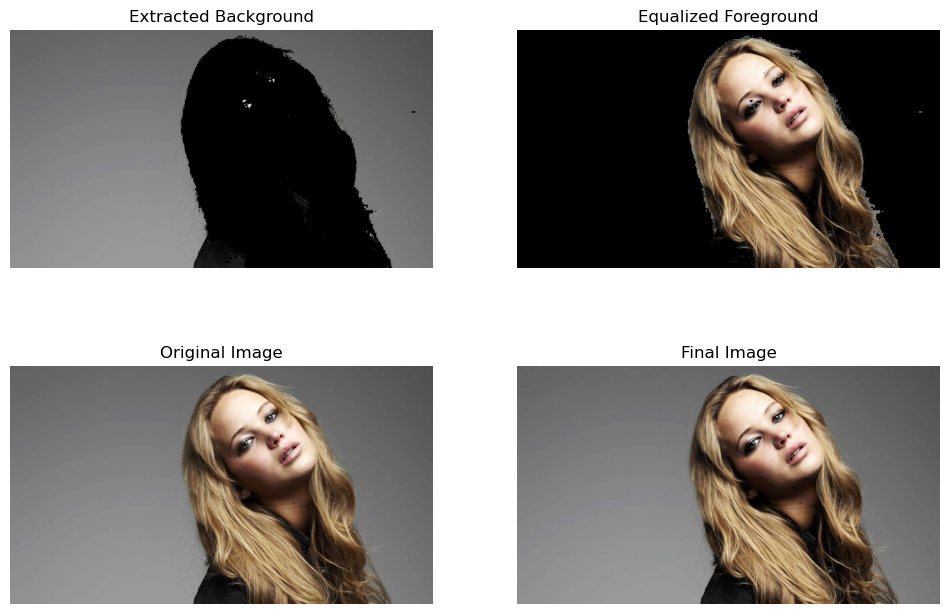

In [ ]:
mask_bg = cv.bitwise_not(mask)
img_background = cv.bitwise_and(hsv_img, hsv_img, mask=mask_bg)

img_final = cv.add(equalized_img,img_background)

fig = plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(cv.cvtColor(img_background,cv.COLOR_HSV2RGB))
plt.title('Extracted Background')
plt.axis('off')

plt.subplot(222)
plt.imshow(cv.cvtColor(equalized_img,cv.COLOR_HSV2RGB))
plt.title('Equalized Foreground')
plt.axis('off')

plt.subplot(223)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(cv.cvtColor(img_final,cv.COLOR_HSV2RGB))
plt.title('Final Image')
plt.axis('off')

plt.show()


## Question 07

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
IMG_PATH="./a1images/"

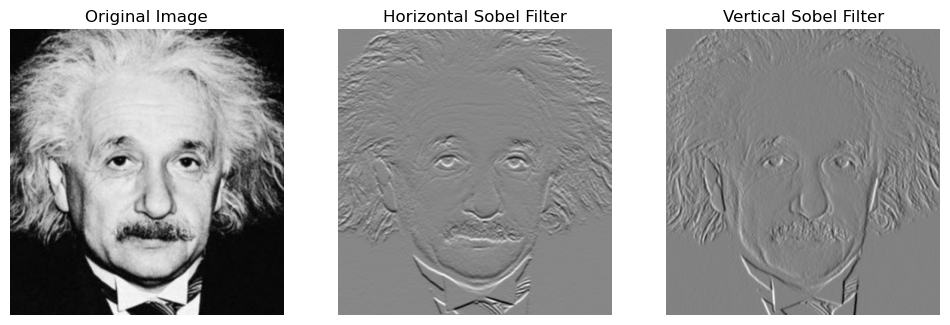

In [ ]:
img = cv.imread(IMG_PATH+"einstein.png", cv.IMREAD_GRAYSCALE)


sobel_X = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float64)

sobel_Y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float64)

img_x = cv.filter2D(img, cv.CV_64F, sobel_X)
img_y = cv.filter2D(img, cv.CV_64F, sobel_Y)

fig = plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_x, cmap='gray')
plt.title('Horizontal Sobel Filter')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_y, cmap='gray')
plt.title('Vertical Sobel Filter')
plt.axis('off')

plt.show()

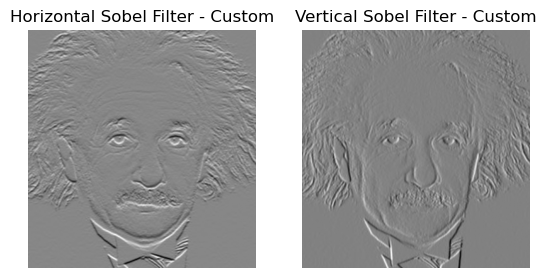

In [21]:
def apply_sobel(image,kernal):
    rows,cols = image.shape
    filtered_img = np.zeros([rows-2,cols-2],dtype=np.float64)

    for i in range(rows-2):
        for j in range(cols-2):
            value = np.sum(np.multiply(image[i:i+3,j:j+3],kernal))
            filtered_img[i,j] = value
    
    return filtered_img

img_x = apply_sobel(img, sobel_X)
img_y = apply_sobel(img, sobel_Y)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.imshow(img_x, cmap='gray')
plt.title('Horizontal Sobel Filter - Custom')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_y, cmap='gray')
plt.title('Vertical Sobel Filter - Custom')
plt.axis('off')

plt.show()

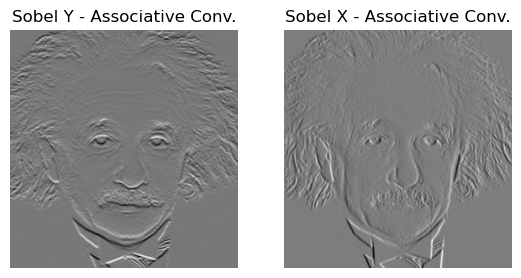

In [25]:
sobel_x_vertical = np.array([[1], [0], [-1]])
sobel_x_horizontal = np.array([[1, 2, 1]])

sobel_y_vertical = np.array([[1], [2], [1]])
sobel_y_horizontal = np.array([[1, 0, -1]])

img_x0 = cv.filter2D(img,cv.CV_64F, sobel_x_vertical)
img_x = cv.filter2D(img_x0,cv.CV_64F, sobel_x_horizontal)

img_y0 = cv.filter2D(img,cv.CV_64F, sobel_y_vertical)
img_y = cv.filter2D(img_y0,cv.CV_64F, sobel_y_horizontal)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.imshow(img_x, cmap='gray')
plt.title('Sobel Y - Associative Conv.')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_y, cmap='gray')
plt.title('Sobel X - Associative Conv.')
plt.axis('off')

plt.show()